## Section 1: Project Setup & Business Problem
####  Business Problem Statement:
A telecom company is experiencing significant customer churn, leading to revenue loss.
This project aims to analyze the key drivers of churn and build a predictive model to identify at-risk customers. The ultimate goal is to provide actionable recommendations for targeted retention strategies to reduce the churn rate by 5% in the next quarter.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
data = pd.read_csv(url)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 2: Data Cleaning and Preprocessing

In [3]:
# Standardizing column formats for analysis.

# Convert SeniorCitizen from 0/1 to No/Yes for better readability in EDA
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace=True)

# TotalCharges for new customers are blank; this is not missing data, it's 0.
# Convert to a numeric type for calculations.
data.TotalCharges.replace([" "], ["0"], inplace=True)
data.TotalCharges = data.TotalCharges.astype(float)

# customerID is a unique identifier and not a predictive feature.
data.drop("customerID", axis=1, inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25260\2524036114.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25260\2524036114.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

## Section 3: Exploratory Data Analysis (EDA) 

### Insight 1: What is the overall churn rate?

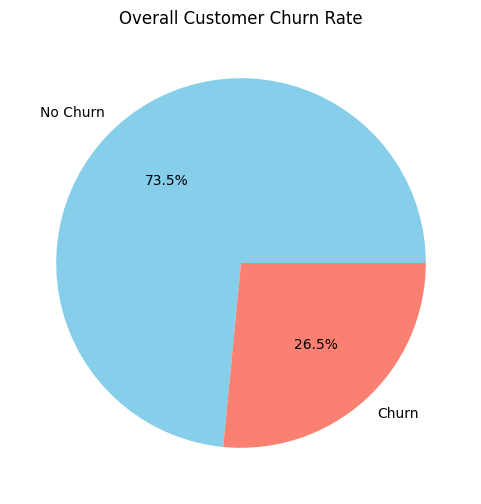

Insight: The company has a significant churn rate of nearly 27%, confirming the business problem.


In [4]:
plt.figure(figsize=(6, 6))
data['Churn'].value_counts().plot(kind='pie', autopct='%.1f%%', labels=['No Churn', 'Churn'], colors=['skyblue', 'salmon'])
plt.title('Overall Customer Churn Rate')
plt.ylabel('')
plt.show()
print("Insight: The company has a significant churn rate of nearly 27%, confirming the business problem.")


### Insight 2: How does the contract type affect churn?

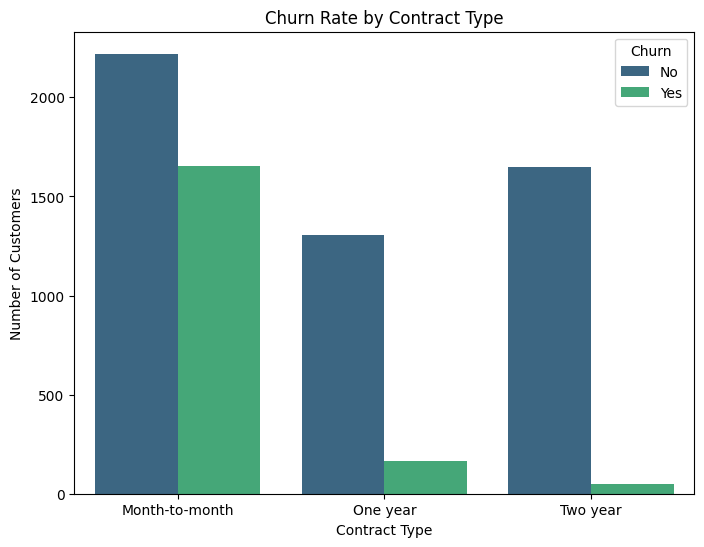

Insight: Customers on Month-to-Month contracts churn at a dramatically higher rate. This is a major risk factor.


In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()
print("Insight: Customers on Month-to-Month contracts churn at a dramatically higher rate. This is a major risk factor.")

### Insight 3: How does tenure affect churn?

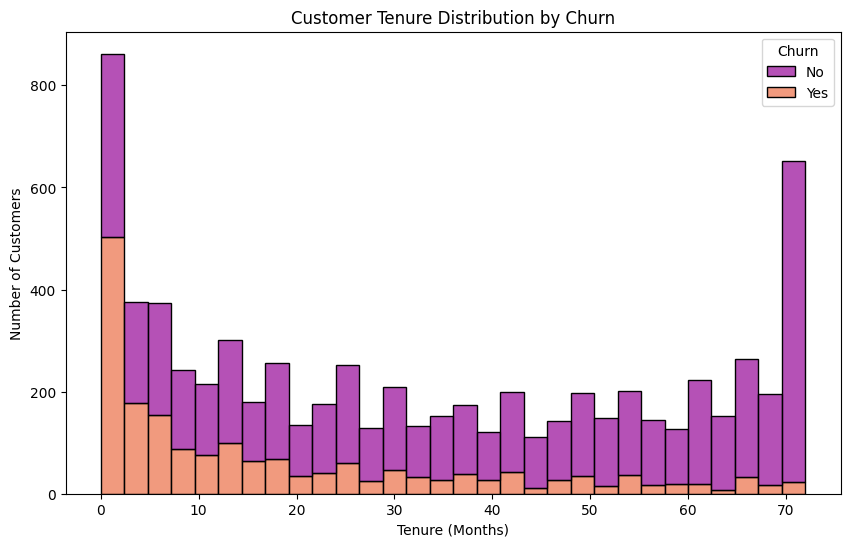

Insight: New customers (low tenure) are far more likely to churn. Loyalty increases significantly over time.


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30, palette='plasma')
plt.title('Customer Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()
print("Insight: New customers (low tenure) are far more likely to churn. Loyalty increases significantly over time.")

## Section 4: Feature Engineering & Model Preparation

In [7]:
# Preparing the data for the predictive model.

# Convert Churn to a binary 0/1 for the model.
data.Churn.replace(["Yes", "No"], [1, 0], inplace=True)

# Convert all categorical variables into numeric format using one-hot encoding.
data_dummies = pd.get_dummies(data)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25260\3035791852.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Churn.replace(["Yes", "No"], [1, 0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25260\3035791852.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.Churn.repla

In [8]:
# Define our features (X) and target (y).
X = data_dummies.drop("Churn", axis=1)
y = data_dummies.Churn

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)


## Section 5: Building and Training the Predictive Model

In [9]:

# 1. Scale the data
# Logistic Regression requires features to be on the same scale to interpret coefficients correctly.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize and Train the Model
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

print("Logistic Regression Model Trained Successfully.")

Logistic Regression Model Trained Successfully.


## Section 6: Model Evaluation from a Business Perspective



--- Business-Focused Model Evaluation ---
Accuracy: 0.7274662881476224

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409



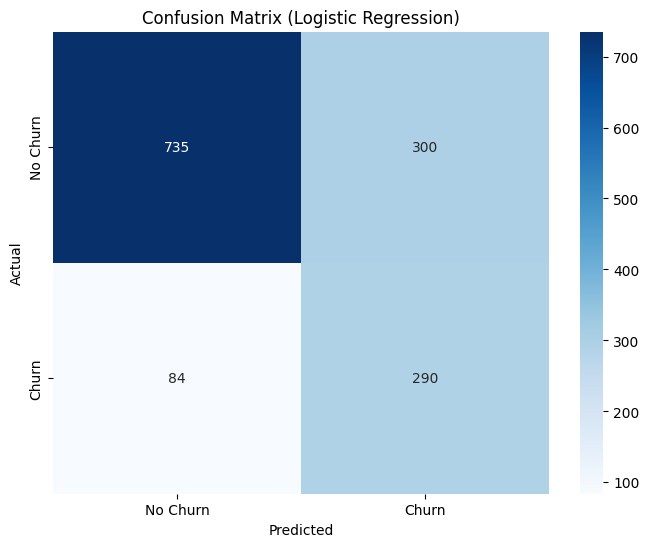


--- Top Drivers Increasing Churn (Positive Coef) ---
                        Feature  Coefficient
2                  TotalCharges     0.778933
17  InternetService_Fiber optic     0.418026
37      Contract_Month-to-month     0.333644
33              StreamingTV_Yes     0.177820
36          StreamingMovies_Yes     0.175705

--- Top Drivers Reducing Churn (Negative Coef/Retention) ---
                            Feature  Coefficient
0                            tenure    -1.464457
1                    MonthlyCharges    -0.932593
39                Contract_Two year    -0.360216
16              InternetService_DSL    -0.334437
32  StreamingTV_No internet service    -0.116320


In [11]:
# Generate predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("\n--- Business-Focused Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- FEATURE IMPORTANCE
# We extract the coefficients to see exactly WHICH features drive churn.
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute impact to see the strongest drivers regardless of direction
feature_importance['Abs_Impact'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Impact', ascending=False)

print("\n--- Top Drivers Increasing Churn (Positive Coef) ---")
print(feature_importance[feature_importance['Coefficient'] > 0].head(5)[['Feature', 'Coefficient']])

print("\n--- Top Drivers Reducing Churn (Negative Coef/Retention) ---")
print(feature_importance[feature_importance['Coefficient'] < 0].head(5)[['Feature', 'Coefficient']])

## Section 7: Summary of Findings & Actionable Recommendations

### Summary of Findings
Using Logistic Regression, I successfully quantified the key drivers of customer attrition. The Feature Importance analysis confirmed that:
1.  **Contract Type** is the strongest predictor of churn. Customers on **Month-to-Month** contracts are significantly more likely to leave than those on one or two-year contracts.
2.  **Tenure** acts as a major stabilizer; the risk of churn drops drastically after the first 12 months.
3.  **Fiber Optic Internet** users show a higher propensity to churn compared to DSL users, potentially indicating dissatisfaction with price or service quality in that specific segment.

### Actionable Recommendations

#### 1. Targeted Contract Conversion Campaign
* **Insight:** Month-to-month contracts are the #1 driver of churn.
* **Action:** Launch a targeted campaign for month-to-month customers with tenure between 2–12 months.
* **Offer:** Provide a "Loyalty Lock-in" discount (e.g., 15% off for 6 months) for switching to a 1-Year Contract.
* **Expected Impact:** Converting these high-risk customers to a contract directly neutralizes the top churn driver identified by the model.

#### 2. Enhanced Fiber Optic Onboarding
* **Insight:** Fiber Optic users have a higher churn rate despite likely being higher-value customers.
* **Action:** Implement a proactive "Service Health Check" for new Fiber Optic customers within their first 60 days.
* **Expected Impact:** Identifies technical or billing frustrations early, preventing them from becoming reasons to cancel.

#### 3. Proactive Retention using Probability Scores
* **Insight:** The model allows us to rank customers by "Churn Probability."
* **Action:** Generate a weekly "At-Risk List" of customers with a churn probability > 70% and route them to a specialized retention team.
* **Expected Impact:** Shifts retention efforts from reactive (waiting for them to call to cancel) to proactive (solving problems before they leave).